<a href="https://colab.research.google.com/github/ShashwatVv/TenDaysTenNotes/blob/main/TwoLayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## `OOPD End Sem Project`
## `Two Layer Perceptron from scratch`




#### Agenda -
<ul>
  <li><b>Apply Inheritance, Polymorphism, Encapsulation, etc.</b></li>
  <li><b>Make subroutines stick to OOPD principles, and comment out each relevant step</b></li>
  <li><b>Loading the dataset into a database and reloading from the later before the process of modelling and evaluation starts</b></li>
  <li>
      <b>Creating a class that implements 2 layer perceptron from scratch based on known principles of OOP design</b>
  </li>
</ul>

## ${@authors}$ 
- ${Shashwat Vaibhav, Giridhar S., Palani Vigneshwar,  Arpit Mathur}$

In [ ]:
## Importing requisite Libraries and Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import sqlite3 as sql
from sklearn.preprocessing import StandardScaler,MinMaxScaler



## Class ALERT!
## A class `DescribeNCreate` which describes all the relevant information and statements(when verbose is True) regarding the dataset.

In [ ]:
## First let's create a generic class returning some descriptive stats about the dataset
class DescribeNCreate():
  def __init__(self, dataset):
    self.datas = dataset
  
  def  information(self, verbose= True):
    ## This method gives(prints out) the generic information about our mnist data
    print(f'This is the mnist data repository')
    print(f'The dataset stores the pixel-wise information of the handwritten digit')
    if verbose == True:
      ##printing only when the user wants all the information
      print('The dataset stores the information for each Image ')
      print('Every pixel-value(intensity) is stored in a column designated for that pixel')
      print(f'Total Number of attributes/features are {len(self.datas.feature_names)} and the features are\n {self.datas.feature_names}')
      print(f'Number of instances: {len(self.datas.data)} . Let\'s take a peek\n {self.datas.data}')
  
  def createDF(self):
    ## This method/routine creates dataframe from the dataset metadata, it can be useful for further analysis
    dummyDF = pd.DataFrame(data = self.datas.data, columns = self.datas.feature_names) 
    ## Now adding the target column
    dummyDF['target'] = self.datas.target
    return dummyDF

  def descriptive_stats(self, dummyDF):
      ## This function is a generic routine that returns the descriptive statistics about a dataframe  
      print('top 5 instances')
      print(dummyDF.head())
      print(f'information:\n {dummyDF.info()}' )
      print(f'Number of columns in the DataFrame(including target): {len(dummyDF.columns)}')
      print(f'Features of the dataframe\n: {dummyDF.columns}')
      print(f'Describing the dataframe:\n {dummyDF.describe().T}')




##  Testing DescribeNCreate with `test_Describe()`

## Database setup

In [ ]:
## implement a database based approach
## to call mnist data, store it by creating dataframe
## using DescribeNCreate class and then store it in a csv file and then restoring it to a sql database




In [ ]:
## Inheritance
## Loading the data to database --> implementation from scratch
class DataBASE(DescribeNCreate): 
     
     
     ## a function that  stores the row-wise data into database of name db_name.db
     def df_to_db(self, dataframe, db_name):
       filename = db_name + '.db'
       ## make connection
       ## add row wise data from dataframe to the .db file using standard sql DDL commands
       ## creating a connection object
       try:
         conn_obj = sql.connect(filename)
         ##print('1st debug pnt')
         print('connected')##adding for debugging purpose
         schema_string = 'CREATE TABLE IF NOT EXISTS mnist_data('
         for col in dataframe.columns:
           if col != 'target':
             schema_string = schema_string + col + ' ' ##-->column name
             schema_string = schema_string + 'REAL, '     ##--> data type of column 
           else:
             ##Last column ---> 'target' of integer type
             schema_string = schema_string + col + ' '
             schema_string = schema_string + 'INTEGER );' 
          ##end of for loop 
          ##****---SCHEMA CREATION---****
          ##Now let's execute the code to create schema for Our database
         ##print('3rd debug pnt') 
         conn_obj.execute(schema_string)
         print('Created Schema')##adding for debugging purpose
         conn_obj.commit() ## committing to ensure the schema and therby table has been  created and saved.
        
         ## Let's ensure that whenever a new object of this type has been created
         ## the data does not get appended everytime to the database table
         ## hence on every new instantiation table content would be deleted
         ##Ensuring-->>

         query_delete = 'DELETE FROM mnist_data'
         conn_obj.execute(query_delete)
         conn_obj.commit()
  
         ## <-- Ensured
          ## Let's insert values into the table

         insert_string_start = 'INSERT INTO mnist_data VALUES('
         insert_string_end = ');'
          
         for locn in np.arange(0, len(dataframe)):
           instance_row_val = dataframe.iloc[locn].values
           upper_bound = len(instance_row_val)
           ##print('inside loop debug pnt')
           insert_string_mid = ''
           for val in np.arange(0,upper_bound):
             if val != (upper_bound-1): 
                ##now  the last element
               insert_string_mid = insert_string_mid + str(instance_row_val[val]) + ',' 

             else:
               ## last element of the row
               insert_string_mid = insert_string_mid + str(instance_row_val[val])


           insert_string = insert_string_start + insert_string_mid + insert_string_end
            
             ## Executing INSERT operation for each instance in dataframe to be inserted as a row in database table
           print('INSERT INTO Query Formulated, Now inserting')
           conn_obj.execute(insert_string)
           conn_obj.commit()

         print(f'Database created successfully inside database file {filename} with the table name ---> mnist_data !!')

       except:
         print("DB ERROR!!!! UNABLE TO CONNECT/ COMMAND FAULT !!!!")
       
       finally:
         ##Let's close the connection object
         print('Closing database connection')
         conn_obj.close()


  

In [ ]:
class FetchDB(DataBASE):
  ## inherits from DataBASE class 

  def db_to_df(self, dbname, tablename):
      db_file    = dbname    + '.db'
      try:
        conn_obj = sql.connect(db_file)
        print('<---- Connection  Established ----->')

        query = f'SELECT * FROM {tablename} ;'

        ## query formulated to select every instance from the database

        created_df = pd.read_sql_query(query, conn_obj)
        print('Executed Query')
        
      
      except:
        ## throws error when issues related to database connectivity or
        ## query error is encountered inside the try block
        print("UNABLE TO CONNECT! ERROR WHILE FETCHING!!")
      
      finally:
        print("<-----Closing connection----->")
        conn_obj.close()

      return created_df





In [ ]:
## Class to add test data and their predicted values to a new database(name provided) with a table(name provided)
class newDataBASE:
  ## defining constructor
  def __init__(self, dbname, tablename):
    self.dbname = dbname + '.db'
    self.tablename = tablename

  def create_table(self, X, Predicted, features):

    try:
      conn_obj = sql.connect(self.dbname)
      print('connected successfully')

      schema_string = f'CREATE TABLE IF NOT EXISTS {self.tablename}('
      for col in features:
          if col != 'target':
            schema_string = schema_string + col + ' ' ##-->column name
            schema_string = schema_string + 'REAL, '     ##--> data type of column 
        
             ##Last column ---> 'target' of integer type
      schema_string = schema_string + 'Predicted' + ' '
      schema_string = schema_string + 'INTEGER );'

      conn_obj.execute(schema_string)
      print('Creation of schema for new database has been successfull')

      insert_start = f'INSERT INTO {self.tablename} VALUES('
      insert_end = ');'
      

      for row in np.arange(0,X.shape[0]):
        insert_mid = ''

        for col in np.arange(0,X.shape[1]):
          insert_mid = insert_mid + str(X[row][col]) + ','
        
        insert_mid = insert_mid + str(Predicted[row])
        
        insert = insert_start + insert_mid + insert_end
        print(insert)

        conn_obj.execute(insert)
      
      conn_obj.commit()

    except:
      print("DATABASE NOT CONNECTED/ COMMAND ERROR  !!")
    
    finally:
      print(f'new table with name {self.tablename} has been created inside {self.dbname}')
      conn_obj.close()



    




## Next Steps

In [ ]:
## activation function class
class activation_function():
  ## sigmoid activation 
  def sigmoid(self,x):

    return 1/(1+ np.exp(-x))

  ## softmax activation 
  def softmax(self,x):
    e = np.exp(x - x.max())
    return e / np.sum(e,axis=0)

  ## tanh activation 
  def tanh(self,x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
  
  ## Relu activation
  def Relu(self,x):
    return np.maximum(0.0,x)

  ## differentiation of sigmoid activation """
  def diff_sigmoid(self,x):
    return self.sigmoid(x) * (1 - self.sigmoid(x))
  
  ## differentiation of softmax activation """
  def diff_softmax(self,x):
    return self.softmax(x) * (1-self.softmax(x))

  ## differentiation of tanh activation """
  def diff_tanh(self,x):
    return 1 - (self.tanh(x))**2

  ## differentiation of relu activation """
  def diff_relu(self,x):
    return np.where(x>0,1.0,0.0)

In [ ]:
## propogation class inheriting the activation class """
class propagation(activation_function):

 ## function that set the weights. Encapsulation is implemented in this function """
  def setw(self,w1,w2,w3):
      
      self.__w1= w1
      self.__w2 = w2
      self.__w3 = w3
## function that sets the bias. Encapsulation is implemented in this function """
  def setb(self,b1,b2,b3):
      self.__b1= b1
      self.__b2 = b2
      self.__b3 = b3

## function to implement forward propagation in the network """
  def forward_propagation(self,train):
    
    layer={}
    
    ##input
    layer['I0'] = train
    
    layer['Y1'] = np.dot(self.__w1,train) + self.__b1
    layer['I1'] = self.Relu(layer['Y1'])

    layer['Y2'] = np.dot(self.__w2,layer['I1']) + self.__b2
    layer['I2'] = self.sigmoid(layer['Y2'])

    layer['Y3'] = np.dot(self.__w3,layer['I2']) + self.__b3
    layer['I3'] = self.softmax(layer['Y3'])

    return layer

## function to implement backward propagation in the network """
  def backward_propagation(self,train_y,layer):
    update_parameters={}

    error = (layer['I3'] - train_y)/layer['I3'].shape[0] * self.diff_softmax(layer['Y3'])
    update_parameters['b3'] = np.sum(error,axis=0)
    update_parameters['w3'] = np.dot( np.reshape(error, (error.size,1 ) ), np.reshape( layer['I2'], (1,layer['I2'].size) ) )
    
    
    error = np.dot(self.__w3.T,error) * self.diff_sigmoid(layer['Y2'])
    update_parameters['b2'] = np.sum(error,axis=0)
    update_parameters['w2'] = np.dot( np.reshape(error, (error.size,1 ) ), np.reshape( layer['I1'], (1,layer['I1'].size) ) )
    

    error = np.dot(self.__w2.T,error) * self.diff_relu(layer['Y1'])
    update_parameters['b1'] = np.sum(error,axis=0)
    update_parameters['w1'] = np.dot( np.reshape(error, (error.size,1 ) ), np.reshape( layer['I0'], (1,layer['I0'].size) ) )
    

    return update_parameters

  


In [ ]:
## class tlp inheriting the propagation class """
class tlp(propagation):
  ## Constructor of the class """ 
  def __init__(self,shape,epochs=10,learn_rate=0.1):
    self.__shape = shape
    self.__epochs = epochs
    self.__learn_rate = learn_rate
    self.initialize()

  ## Initializing the weights and bias of the layers in the network and also creating input layer, two hidden layers and one output layer """
  def initialize(self):
    input = self.__shape[0]
    hidden_layer1 = self.__shape[1]
    hidden_layer2 = self.__shape[2]
    output = self.__shape[3]
    np.random.seed(0)
    ## Initializing the weights by selecting random value """
    self.__w1 = np.random.randn(hidden_layer1,input)
    self.__w2 = np.random.randn(hidden_layer2,hidden_layer1)
    self.__w3 = np.random.randn(output,hidden_layer2)

    ## Initializing the bias by selecting random value"""
    self.__b1 = np.random.randn(self.__w1.shape[0],)
    self.__b2 = np.random.randn(self.__w2.shape[0],)
    self.__b3 = np.random.randn(self.__w3.shape[0],)

  
  
    ##  function to update the weights and bias """
  def update(self,update_parameters):

    self.__w3 -= self.__learn_rate*update_parameters['w3']
    self.__w2 -= self.__learn_rate*update_parameters['w2']
    self.__w1 -= self.__learn_rate*update_parameters['w1']

    self.__b3 -= self.__learn_rate*update_parameters['b3']
    self.__b2 -= self.__learn_rate*update_parameters['b2']
    self.__b1 -= self.__learn_rate*update_parameters['b1']

  ## function to train the model """
  def train(self,train_x,train_y):
    
    for i in range(self.__epochs):
      for j in range(len(train_x)):
        self.setw(self.__w1,self.__w2,self.__w3)
        self.setb(self.__b1,self.__b2,self.__b3)
        layer = self.forward_propagation(train_x[j])
        update_parameters = self.backward_propagation(train_y[j],layer)
        self.update(update_parameters)

  ## function to predict the output """
  def predict(self,test_x):
    pred=[]
    for j in range(len(test_x)):
        layer = self.forward_propagation(test_x[j])
        pred.append(np.argmax(layer['I3']))

    return pred
    
  ## function to find the accuracy"""
  def accuracy(self,y,pred):
    comm=[]
    for i in range(len(y)):
      if y[i]==pred[i]:
        comm.append(y[i])

    return len(comm)/len(y)

    

In [ ]:
!pip install pycallgraph 

  Created wheel for pycallgraph: filename=pycallgraph-1.0.1-py3-none-any.whl size=36103 sha256=e3a590fdee0acbe904eb9ffde4e808e8683c0c09395535a3145c2462ede1deab
  Stored in directory: /root/.cache/pip/wheels/2c/3d/e8/6f0aaf3d5ece26c5ab6ab37062d8470b612ac2c2e259717d25
Successfully built pycallgraph


In [ ]:
from pycallgraph import PyCallGraph
from pycallgraph.output import GraphvizOutput
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from pycallgraph import Config
from pycallgraph import GlobbingFilter
config = Config(max_depth=3)
config.trace_filter = GlobbingFilter(exclude=[
    'pycallgraph.*',
    '*.secret_function',
    'pandas.*', 'sklearn.*', 'scipy.*', 'ipykernel.*'
])





def main():
  
    graphviz = GraphvizOutput()
    graphviz.output_file = 'basic.png'
    mnist = load_digits()

    with PyCallGraph(output=graphviz, config=config):

         ## For imports and other prerequisites, please go through the readme file

  ## Loading the mnist dataset. 
  ## mnist data can be loaded by importing load_digits() from sklearn.datasets which has already been imported.
         
  
  ##  testing database class
  ## creating db instance
          db_obj = DataBASE(mnist)

  ##  creating dataframe using parent class method //---inheritance
          df = db_obj.createDF()

          db_obj.df_to_db(df, 'auxillary') ## auxillary is the name of database that will be created

          obj_fetchdb = FetchDB(mnist)
          df_new = obj_fetchdb.db_to_df('auxillary', 'mnist_data') ## mnist_data is the table name inside auxillary.db database

          X = df_new.drop('target', axis = 1).to_numpy()
          Y = df_new['target'].to_numpy()

          
  
          X = StandardScaler().fit_transform(X)
          X = MinMaxScaler().fit_transform(X)

          Y1 = pd.DataFrame(Y)
          Y1 = pd.get_dummies(Y1[0],dtype=np.float64)
          Y1 = np.array(Y1)

          

          train_x,test_x,train_y,test_y = train_test_split(X,Y1,random_state=0,train_size=0.7)
          train_x1,test_x1,train_y1,test_y1 = train_test_split(X,Y,random_state=0,train_size=0.7)

          dp1 = tlp(shape=[64, 32, 16, 10],epochs=30,learn_rate=4)
          dp1.train(train_x,train_y)
          qpred = dp1.predict(train_x)
          pred1 = dp1.predict(test_x)

          print(dp1.accuracy(train_y1,qpred))

          print(dp1.accuracy(test_y1,pred1))

  ## Let's store the predicted values into a database of our choice
  ## for this We will be calling class newDataBASE

          new_database = newDataBASE('MnistPrediction', 'Prediction') 
  ## passed database name and tablename to the database
          new_database.create_table(test_x, pred1, mnist.feature_names)


if __name__ == '__main__':
    main()

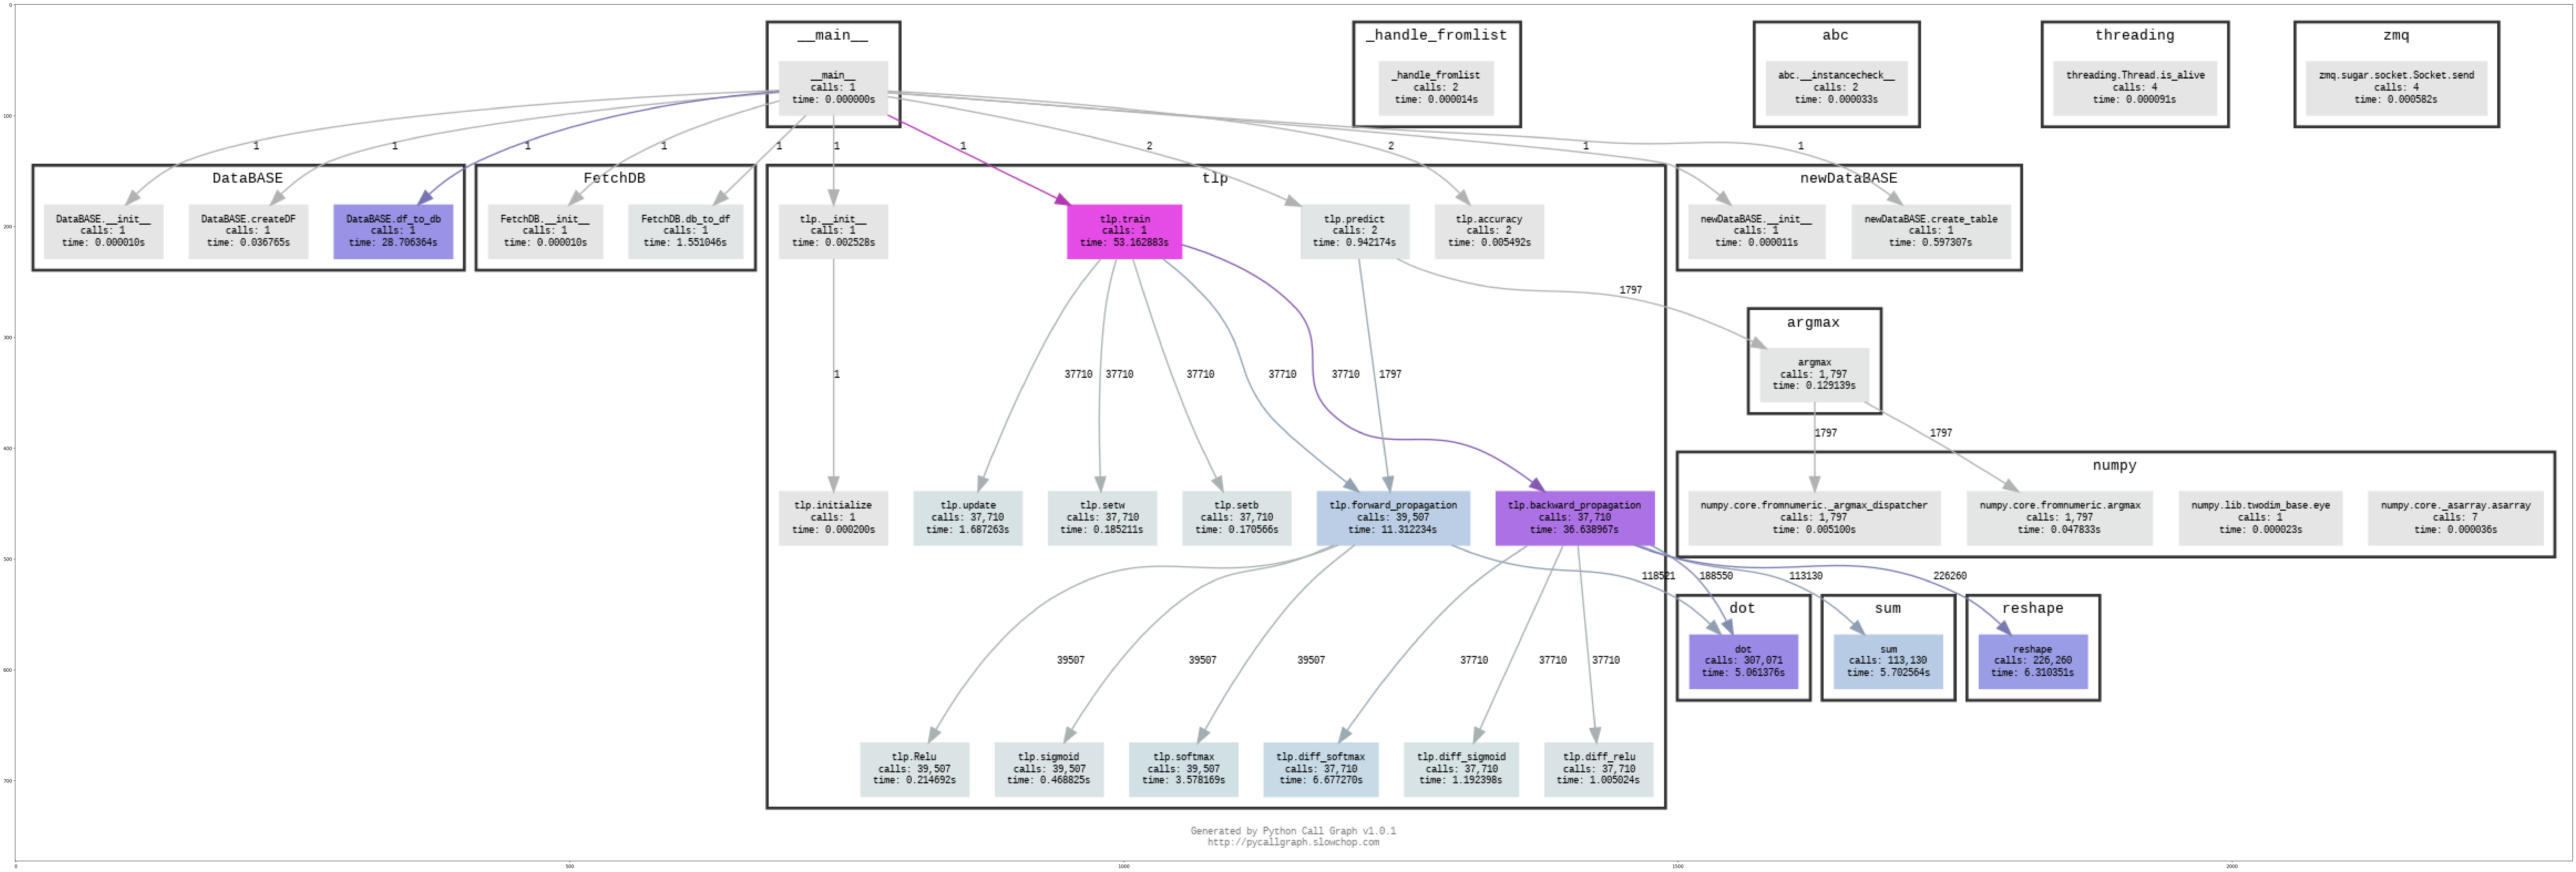

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as img
plt.figure(figsize=(100,100),dpi =150)
image = img.imread('basic.png')
plt.imshow(image)